In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp "/content/gdrive/My Drive/Urdu_mnist/dataset.zip" "/content/"

In [0]:
!cp "/content/gdrive/My Drive/Urdu_mnist/test_dataset.zip" "/content"

In [0]:
!unzip "/content/dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: content/dataset/digit_1/writer351_pass08_digit1.bmp  
  inflating: content/dataset/digit_1/writer074_pass08_digit1.bmp  
  inflating: content/dataset/digit_1/writer127_pass03_digit1.bmp  
  inflating: content/dataset/digit_1/writer493_pass10_digit1.bmp  
  inflating: content/dataset/digit_1/writer512_pass07_digit1.bmp  
  inflating: content/dataset/digit_1/writer261_pass08_digit1.bmp  
  inflating: content/dataset/digit_1/writer361_pass10_digit1.bmp  
  inflating: content/dataset/digit_1/writer203_pass07_digit1.bmp  
  inflating: content/dataset/digit_1/writer184_pass02_digit1.bmp  
  inflating: content/dataset/digit_1/writer243_pass09_digit1.bmp  
  inflating: content/dataset/digit_1/writer479_pass03_digit1.bmp  
  inflating: content/dataset/digit_1/writer253_pass06_digit1.bmp  
  inflating: content/dataset/digit_1/writer354_pass09_digit1.bmp  
  inflating: content/dataset/digit_1/writer045_pass02_digit1.bmp  
  inflating

In [0]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt 
import sklearn
import imutils 
import os 
import numpy as np
from IPython.display import Image, display
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import  np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPool2D,ZeroPadding2D,Convolution2D,MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization
from keras.optimizers import SGD,RMSprop

Using TensorFlow backend.


In [0]:
digit_0=os.listdir("/content/content/dataset/digit_0")
digit_1=os.listdir("/content/content/dataset/digit_1")
digit_2=os.listdir("/content/content/dataset/digit_2")
digit_3=os.listdir("/content/content/dataset/digit_3")
digit_4=os.listdir("/content/content/dataset/digit_4")
digit_5=os.listdir("/content/content/dataset/digit_5")
digit_6=os.listdir("/content/content/dataset/digit_6")
digit_7=os.listdir("/content/content/dataset/digit_7")
digit_8=os.listdir("/content/content/dataset/digit_8")
digit_9=os.listdir("/content/content/dataset/digit_9")

plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

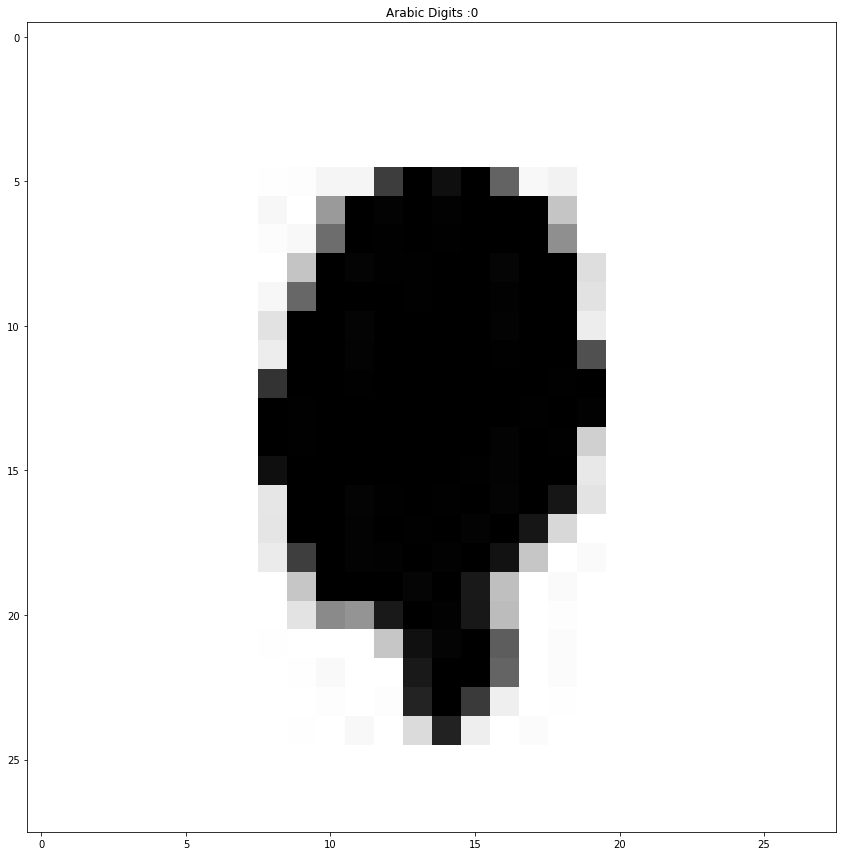

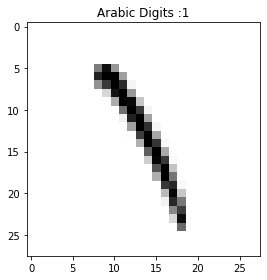

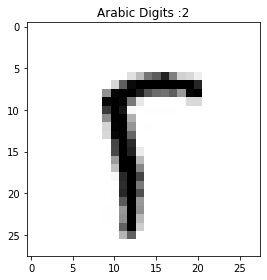

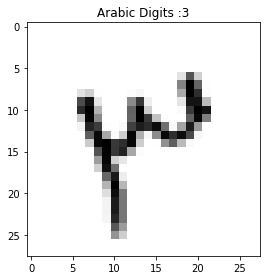

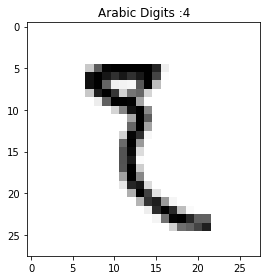

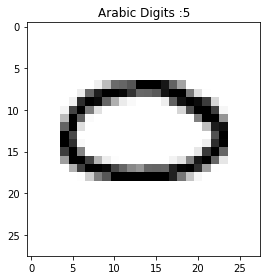

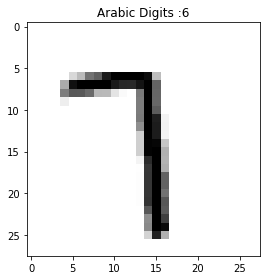

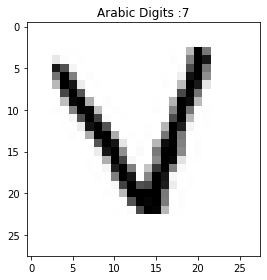

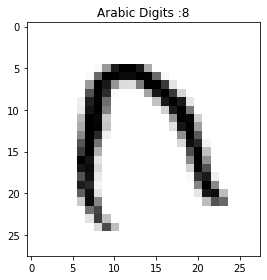

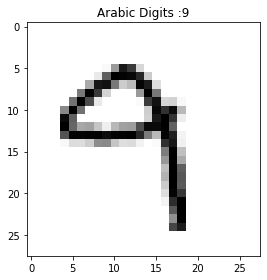

In [0]:
plt.figure(figsize=(12,12))
l=[digit_0,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,digit_7,digit_8,digit_9]
for j in range(10):
  a=l[j]
  for i in range(4):
      plt.plot()
      img=cv2.imread('/content/content/dataset/digit_' + str(j)+"/" + a[i])
      plt.imshow(img)
      plt.title('Arabic Digits :' + str(j))
      plt.tight_layout()
  plt.show()

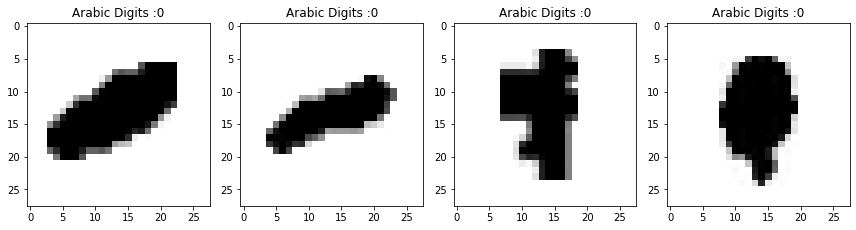

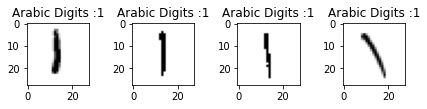

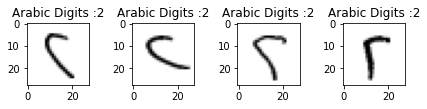

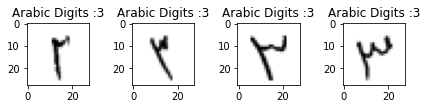

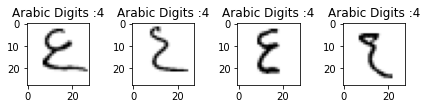

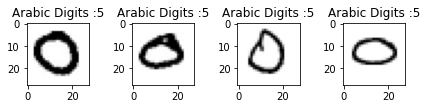

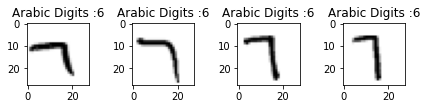

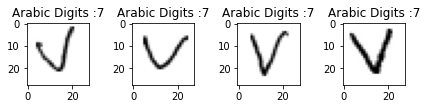

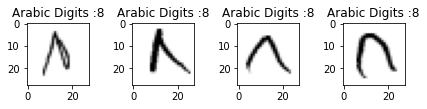

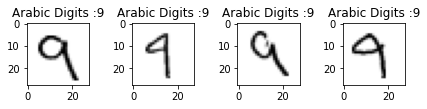

In [0]:
plt.figure(figsize=(12,12))
l=[digit_0,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,digit_7,digit_8,digit_9]
for j in range(10):
  a=l[j]
  for i in range(4):
      plt.subplot(1,4,i+1)
      img=cv2.imread('/content/content/dataset/digit_' + str(j)+"/" + a[i])
      plt.imshow(img)
      plt.title('Arabic Digits :' + str(j))
      plt.tight_layout()
  plt.show()

In [0]:
data=[]
labels=[]
for j in range(10):
  for i in range(len(l[j])):
        img=cv2.imread('/content/content/dataset/digit_' + str(j)+"/" + l[j][i])
        img_resize=cv2.resize(img,(28,28))
        img_gray=cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
        img_array=img_to_array(img_gray)
        data.append(img_array)
        labels.append(j)


In [0]:
image_data=np.array(data)
labels=np.array(labels)

In [0]:
idx=np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data=image_data[idx]
labels=labels[idx]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(image_data,labels,test_size=0.4, random_state=101)

In [0]:
y_train=np_utils.to_categorical(y_train,num_classes=10)
y_test=np_utils.to_categorical(y_test,num_classes=10)

In [0]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
out=model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=RMSprop(),metrics=['accuracy'], loss="categorical_crossentropy")



In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

In [0]:
history=model.fit(X_train,y_train,epochs=20,batch_size=32, validation_data=(X_test,y_test))

Train on 36000 samples, validate on 24000 samples
Epoch 1/20
36000/36000 [==============================] - 22s 614us/step - loss: 0.0776 - accuracy: 0.9777 - val_loss: 0.0607 - val_accuracy: 0.9819
Epoch 2/20
36000/36000 [==============================] - 16s 436us/step - loss: 0.0368 - accuracy: 0.9892 - val_loss: 0.0638 - val_accuracy: 0.9841
Epoch 3/20
36000/36000 [==============================] - 16s 438us/step - loss: 0.0287 - accuracy: 0.9921 - val_loss: 0.0392 - val_accuracy: 0.9904
Epoch 4/20
36000/36000 [==============================] - 16s 435us/step - loss: 0.0211 - accuracy: 0.9939 - val_loss: 0.0456 - val_accuracy: 0.9898
Epoch 5/20
36000/36000 [==============================] - 16s 437us/step - loss: 0.0200 - accuracy: 0.9947 - val_loss: 0.0509 - val_accuracy: 0.9885
Epoch 6/20
36000/36000 [==============================] - 16s 456us/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0550 - val_accuracy: 0.9883
Epoch 7/20
36000/36000 [==============================] 

In [0]:
from keras import backend as K
for l in range(len(model.layers)):
    print(l, model.layers[l])

0 <keras.layers.convolutional.Conv2D object at 0x7fd30b86d208>
1 <keras.layers.pooling.MaxPooling2D object at 0x7fd30b86d860>
2 <keras.layers.normalization.BatchNormalization object at 0x7fd30ce7bef0>
3 <keras.layers.convolutional.Conv2D object at 0x7fd30b86d908>
4 <keras.layers.pooling.MaxPooling2D object at 0x7fd300143ba8>
5 <keras.layers.normalization.BatchNormalization object at 0x7fd30adfbb38>
6 <keras.layers.convolutional.Conv2D object at 0x7fd30b86d7b8>
7 <keras.layers.pooling.MaxPooling2D object at 0x7fd300119898>
8 <keras.layers.normalization.BatchNormalization object at 0x7fd300162eb8>
9 <keras.layers.core.Flatten object at 0x7fd30012c630>
10 <keras.layers.core.Dense object at 0x7fd3001369e8>
11 <keras.layers.core.Dense object at 0x7fd3000c4780>


In [0]:
getFeature = K.function([model.layers[0].input, K.learning_phase()],
                        [model.layers[9].output])

In [0]:
exTrain3000 = getFeature([X_train[:3000], 0])[0]
exTest1000 = getFeature([X_test[:1000], 0])[0]

In [0]:
y_train3000 = y_train[:3000].reshape(y_train[:3000].shape[0],)
y_test1000 = y_test[:1000]

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['rbf'], 
              'C':[1, 10, 100, 1000],
              'gamma':[1e-3, 1e-4]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(exTrain3000, y_train3000)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
svmclf = clf.best_estimator_
svmclf.fit(exTrain3000, y_train3000)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize = (10,7))
    sn.heatmap(df_cmx, annot=True)
    plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:


y_testSVM = svmclf.predict(exTest1000)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#print_cmx(y_test1000.T[0], y_testSVM)
print(classification_report(y_test1000, y_testSVM))
print("Accuracy: {0}".format(accuracy_score(y_test1000, y_testSVM)))



              precision    recall  f1-score   support

           0       0.93      0.97      0.95       106
           1       0.98      0.98      0.98        96
           2       0.95      0.98      0.97       104
           3       0.99      0.98      0.98        88
           4       1.00      0.99      1.00       109
           5       0.93      0.93      0.93       108
           6       0.99      0.99      0.99       101
           7       0.99      0.97      0.98        97
           8       0.99      0.97      0.98        86
           9       0.97      0.96      0.97       105

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

Accuracy: 0.971


In [0]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

NameError: ignored

<Figure size 576x432 with 0 Axes>

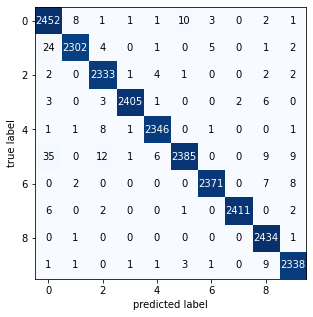

In [0]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

Accuracy : 0.990625
Classification report                precision    recall  f1-score   support

           0       0.97      0.99      0.98      2479
           1       0.99      0.98      0.99      2339
           2       0.99      0.99      0.99      2345
           3       1.00      0.99      1.00      2420
           4       0.99      0.99      0.99      2359
           5       0.99      0.97      0.98      2457
           6       1.00      0.99      0.99      2388
           7       1.00      1.00      1.00      2422
           8       0.99      1.00      0.99      2436
           9       0.99      0.99      0.99      2355

   micro avg       0.99      0.99      0.99     24000
   macro avg       0.99      0.99      0.99     24000
weighted avg       0.99      0.99      0.99     24000
 samples avg       0.99      0.99      0.99     24000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [0]:
regr = RandomForestClassifier(max_depth=12, random_state=0, n_estimators=100)
regr.fit(exTrain3000, y_train3000)
y_predict_regr=regr.predict(exTest1000)
mse_regr=accuracy_score(y_predict_regr,y_test1000)
print("raindom forest",mse_regr)
print("Classifcation report ", classification_report(y_test1000,y_predict_regr, labels=[i for i in range(0,10)]))

raindom forest 0.939
Classifcation report                precision    recall  f1-score   support

           0       0.98      0.92      0.95       106
           1       0.94      0.97      0.95        96
           2       0.92      0.88      0.90       104
           3       0.91      0.98      0.94        88
           4       0.92      0.94      0.93       109
           5       0.89      0.94      0.91       108
           6       0.94      0.97      0.96       101
           7       1.00      0.97      0.98        97
           8       0.99      0.90      0.94        86
           9       0.92      0.92      0.92       105

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [0]:

model=CatBoostClassifier(iterations=100, depth=4, learning_rate=0.1)
model.fit(exTrain3000, y_train3000,eval_set=(exTest1000, y_test1000),plot=True)
y_predict_catboost=model.predict(exTest1000)
acc_catboost=accuracy_score(y_predict_catboost,y_test1000)
print("CatBoost",acc_catboost)
print("Classifcation report ", classification_report(y_test1000,y_predict_catboost, labels=[i for i in range(0,10)]))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.1276970	test: 2.1312165	best: 2.1312165 (0)	total: 126ms	remaining: 12.5s
1:	learn: 2.0072432	test: 2.0153688	best: 2.0153688 (1)	total: 180ms	remaining: 8.82s
2:	learn: 1.8912822	test: 1.9048201	best: 1.9048201 (2)	total: 232ms	remaining: 7.52s
3:	learn: 1.8110490	test: 1.8269116	best: 1.8269116 (3)	total: 285ms	remaining: 6.84s
4:	learn: 1.7248108	test: 1.7430967	best: 1.7430967 (4)	total: 345ms	remaining: 6.55s
5:	learn: 1.6694703	test: 1.6906744	best: 1.6906744 (5)	total: 398ms	remaining: 6.24s
6:	learn: 1.6084063	test: 1.6311493	best: 1.6311493 (6)	total: 466ms	remaining: 6.18s
7:	learn: 1.5564610	test: 1.5777351	best: 1.5777351 (7)	total: 531ms	remaining: 6.11s
8:	learn: 1.5028779	test: 1.5302928	best: 1.5302928 (8)	total: 588ms	remaining: 5.94s
9:	learn: 1.4452908	test: 1.4733586	best: 1.4733586 (9)	total: 642ms	remaining: 5.78s
10:	learn: 1.3922122	test: 1.4202167	best: 1.4202167 (10)	total: 696ms	remaining: 5.63s
11:	learn: 1.3492431	test: 1.3759795	best: 1.3759795

In [0]:

svc2 = SVC(kernel='rbf')
svc2.fit(exTrain3000, y_train3000)
y_pred_svc2=svc2.predict(exTest1000)
svc_acc=accuracy_score(y_pred_svc2,y_test1000)
print("svm",svc_acc)
print("Classifcation report ", classification_report(y_test1000,y_pred_svc2, labels=[i for i in range(0,10)]))

svm 0.945
Classifcation report                precision    recall  f1-score   support

           0       0.97      0.93      0.95       106
           1       0.97      0.97      0.97        96
           2       0.94      0.89      0.92       104
           3       0.94      0.95      0.95        88
           4       0.90      0.95      0.93       109
           5       0.89      0.95      0.92       108
           6       0.97      0.99      0.98       101
           7       0.98      0.93      0.95        97
           8       0.98      0.93      0.95        86
           9       0.93      0.94      0.94       105

    accuracy                           0.94      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.94      0.95      1000



In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(exTrain3000, y_train3000)
y_pred_lg=clf.predict(exTest1000)
lg_acc=accuracy_score(y_pred_lg,y_test1000)
print("Logistic Regression",lg_acc)
print("Classifcation report ", classification_report(y_test1000,y_pred_lg, labels=[i for i in range(0,10)]))


Logistic Regression 0.938
Classifcation report                precision    recall  f1-score   support

           0       0.95      0.94      0.95       106
           1       0.99      0.99      0.99        96
           2       0.89      0.89      0.89       104
           3       0.89      0.97      0.92        88
           4       0.89      0.95      0.92       109
           5       0.94      0.88      0.91       108
           6       0.97      0.98      0.98       101
           7       1.00      0.94      0.97        97
           8       0.98      0.93      0.95        86
           9       0.91      0.91      0.91       105

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
regrada = AdaBoostClassifier(random_state=0, n_estimators=100)
regrada.fit(exTrain3000, y_train3000)
y_predict_regrada=regrada.predict(exTest1000)
mseada=accuracy_score(y_predict_regrada,y_test1000)
print("Ada boost ",mseada)
print("Classifcation report ", classification_report(y_test1000,y_predict_regrada, labels=[i for i in range(0,10)]))



Ada boost  0.547
Classifcation report                precision    recall  f1-score   support

           0       0.98      0.80      0.88       106
           1       0.83      0.79      0.81        96
           2       0.45      0.63      0.52       104
           3       0.30      0.64      0.41        88
           4       0.48      0.37      0.42       109
           5       0.48      0.36      0.41       108
           6       0.71      0.75      0.73       101
           7       0.56      0.49      0.52        97
           8       0.48      0.57      0.52        86
           9       0.46      0.11      0.18       105

    accuracy                           0.55      1000
   macro avg       0.57      0.55      0.54      1000
weighted avg       0.58      0.55      0.54      1000



In [0]:
xb=XGBClassifier()
xb.fit(exTrain3000, y_train3000)
y_predict_xb=xb.predict(exTest1000)
msexb=accuracy_score(y_predict_xb,y_test1000)
print("XG boost ",msexb)
print("Classifcation report ", classification_report(y_test1000,y_predict_xb, labels=[i for i in range(0,10)]))


XG boost  0.932
Classifcation report                precision    recall  f1-score   support

           0       0.98      0.95      0.97       106
           1       0.98      0.96      0.97        96
           2       0.88      0.88      0.88       104
           3       0.90      0.94      0.92        88
           4       0.91      0.94      0.92       109
           5       0.92      0.88      0.90       108
           6       0.99      0.96      0.97       101
           7       0.99      0.97      0.98        97
           8       0.86      0.93      0.89        86
           9       0.91      0.92      0.92       105

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

